# Machine Learning

## Intelligence artificielle, machine learning, deep learning…


![image](https://nantesdigitalweek.com/wp-content/uploads/2022/08/15803247432471_Capture-de%CC%81cran-2020-01-29-a%CC%80-20.04.44.png)

- **Intelligence Artificielle (IA)** : Ensemble de techniques permettant aux machines de simuler des formes d'intelligence humaine, comme le raisonnement, l'apprentissage ou la résolution de problèmes.

- **Machine Learning (ML)** : Sous-domaine de l'IA où les systèmes apprennent à partir de données pour effectuer des prédictions ou des décisions sans être explicitement programmés. (La machine apprend elle-même.)

- **Deep Learning (DL)** : Branche du ML utilisant des réseaux neuronaux profonds pour modéliser des relations complexes dans les données. (s’inspire ici du fonctionnement du cerveau humain, grâce à des neurones artificiels.)



# IA basique

In [1]:
from IPython.display import HTML
import time

def create_animation():
    return HTML('''
    <div id="animation" style="width: 400px; height: 400px; position: relative; background: white;">
        <div id="point" style="width: 10px; height: 10px; background: blue; position: absolute; border-radius: 50%;"></div>
        <div id="square" style="width: 40px; height: 40px; background: red; position: absolute;"></div>
    </div>

    <script>
        var point = document.getElementById('point');
        var square = document.getElementById('square');
        var pointX = 50;
        var pointY = 50;
        var squareX = 300;
        var squareY = 300;
        var speed = 2;

        square.style.left = squareX + 'px';
        square.style.top = squareY + 'px';

        function animate() {
            if(pointX < squareX) pointX += speed;
            if(pointX > squareX) pointX -= speed;
            if(pointY < squareY) pointY += speed;
            if(pointY > squareY) pointY -= speed;

            point.style.left = pointX + 'px';
            point.style.top = pointY + 'px';

            requestAnimationFrame(animate);
        }

        animate();
    </script>
    ''')

create_animation()

In [4]:
from IPython.display import HTML

def create_animation():
    return HTML('''
    <div id="animation" style="width: 400px; height: 400px; position: relative; background: white;">
        <div id="point" style="width: 10px; height: 10px; background: blue; position: absolute; border-radius: 50%;"></div>
        <div id="square" style="width: 40px; height: 40px; background: red; position: absolute;"></div>
    </div>

    <script>
        const animation = document.getElementById('animation');
        const point = document.getElementById('point');
        const square = document.getElementById('square');
        let pointX = 50;
        let pointY = 50;
        const squareX = 300;
        const squareY = 300;
        const speed = 2;
        const obstacles = [];

        square.style.left = squareX + 'px';
        square.style.top = squareY + 'px';

        function initObstacles() {
            for (let i = 0; i < 4; i++) {
                const obstacle = document.createElement('div');
                obstacle.style.width = '30px';
                obstacle.style.height = '30px';
                obstacle.style.background = 'black';
                obstacle.style.position = 'absolute';

                let x, y;
                do {
                    x = Math.random() * 350;
                    y = Math.random() * 350;
                } while (
                    Math.abs(x - pointX) < 10 ||
                    Math.abs(y - pointY) < 10 ||
                    Math.abs(x - squareX) < 10 ||
                    Math.abs(y - squareY) < 10
                );

                obstacle.style.left = x + 'px';
                obstacle.style.top = y + 'px';
                animation.appendChild(obstacle);
                obstacles.push({x: x, y: y});
            }
        }

        initObstacles();

        function checkCollision(nextX, nextY) {
            for (let obs of obstacles) {
                if (Math.abs(nextX - obs.x) < 30 && Math.abs(nextY - obs.y) < 30) {
                    return true;
                }
            }
            return false;
        }

        function findSafeDirection(currentX, currentY, targetX, targetY) {
            const angles = [0, 45, 90, 135, 180, 225, 270, 315];
            let bestAngle = 0;
            let minDistance = Infinity;

            for (let angle of angles) {
                const rad = angle * Math.PI / 180;
                const testX = currentX + Math.cos(rad) * speed;
                const testY = currentY + Math.sin(rad) * speed;

                if (!checkCollision(testX, testY)) {
                    const dist = Math.hypot(testX - targetX, testY - targetY);
                    if (dist < minDistance) {
                        minDistance = dist;
                        bestAngle = rad;
                    }
                }
            }

            return {
                x: Math.cos(bestAngle) * speed,
                y: Math.sin(bestAngle) * speed
            };
        }

        function animate() {
            const direction = findSafeDirection(pointX, pointY, squareX, squareY);

            if (Math.abs(pointX - squareX) > speed || Math.abs(pointY - squareY) > speed) {
                const nextX = pointX + direction.x;
                const nextY = pointY + direction.y;

                if (!checkCollision(nextX, nextY)) {
                    pointX = nextX;
                    pointY = nextY;
                }
            }

            point.style.left = pointX + 'px';
            point.style.top = pointY + 'px';

            requestAnimationFrame(animate);
        }

        animate();
    </script>
    ''')

create_animation()

# Machine Learning

## Comment cela fonctionne-t-il ?


Algèbre linéaire, une fonction cout, et de l’optimisation.

La fonction coût permet d'évaluer la différence entre les prédictions de l'algorithme et les valeurs réelles. Elle sert de guide pour optimiser les paramètres du modèle. Par exemple, pour la régression linéaire :

### Exemple la régression linéaire :
$$ \hat{y} = mx + b $$

### fonction coût : ici MSE
$$J(m, b) = \frac{1}{N} \sum_{i=1}^N (y_i - (mx_i + b))^2$$
ou:
$$J(m, b) = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2$$

L'optimisation consiste à ajuster $ m $ et $ b $ pour minimiser $ J(m, b) $, généralement à l'aide de méthodes comme la descente de gradient.

### l’optimisation:

### Étapes de la descente de gradient

1. **Initialisation des paramètres :**
   - Choisir des valeurs initiales pour $ m $ et $ b $ (souvent 0 ou des petites valeurs aléatoires).

2. **Calcul du gradient :**
   - Pour $ m $ :

     $$
     \frac{\partial J}{\partial m} = -\frac{2}{N} \sum_{i=1}^N x_i \cdot (y_i - \hat{y}_i)
     $$

   - Pour $ b $ :

     $$
     \frac{\partial J}{\partial b} = -\frac{2}{N} \sum_{i=1}^N (y_i - \hat{y}_i)
     $$

3. **Mise à jour des paramètres :**
   - $m$ :

     $$
     m := m - \alpha \cdot \frac{\partial J}{\partial m}
     $$
   - $ b $ :

     $$
     b := b - \alpha \cdot \frac{\partial J}{\partial b}
     $$

   - Où $\alpha $ est le taux d'apprentissage (learning rate).

4. **Répéter les étapes 2 et 3 :**
   - Répéter jusqu'à ce que les gradients soient proches de zéro ou que le nombre d'itérations fixé soit atteint.


Epoch 0, m: 0.2712, b: 0.0768
Epoch 100, m: 1.1109, b: 0.4518
Epoch 200, m: 1.0848, b: 0.5461
Epoch 300, m: 1.0662, b: 0.6133
Epoch 400, m: 1.0529, b: 0.6612
Epoch 500, m: 1.0435, b: 0.6953
Epoch 600, m: 1.0367, b: 0.7196
Epoch 700, m: 1.0319, b: 0.7370
Epoch 800, m: 1.0285, b: 0.7493
Epoch 900, m: 1.0261, b: 0.7581
m: 1.024328159545547, b: 0.7643739707229885


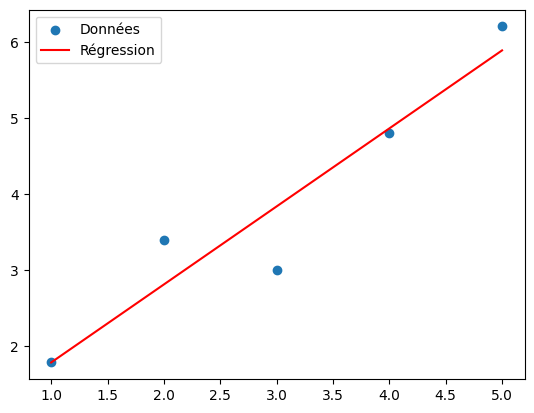

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1, 2, 3, 4, 5])
y = np.array([1.8, 3.4, 3.0, 4.8, 6.2])

m, b = 0.0, 0.0
learning_rate = 0.01
epochs = 1000

# gd
for _ in range(epochs):
    y_pred = m * X + b
    gradient_m = -2 * np.sum(X * (y - y_pred)) / len(X)
    gradient_b = -2 * np.sum(y - y_pred) / len(X)
    m -= learning_rate * gradient_m
    b -= learning_rate * gradient_b

    if _ % 100 == 0:
      print(f"Epoch {_}, m: {m:.4f}, b: {b:.4f}")

print(f"m: {m}, b: {b}")

# Visualisation
plt.scatter(X, y, label="Données")
plt.plot(X, m * X + b, color='red', label="Régression")
plt.legend()
plt.show()

Epoch 0, m: 0.2712, b: 0.0768


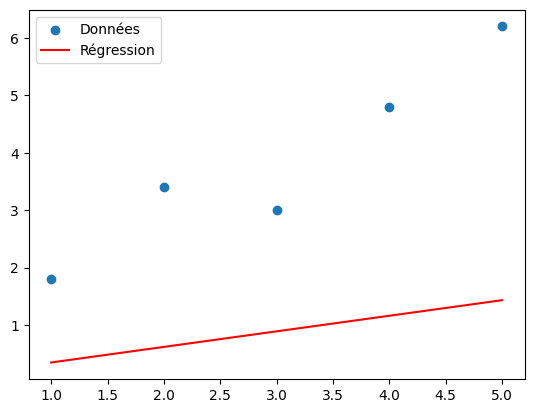

Epoch 100, m: 1.1109, b: 0.4518


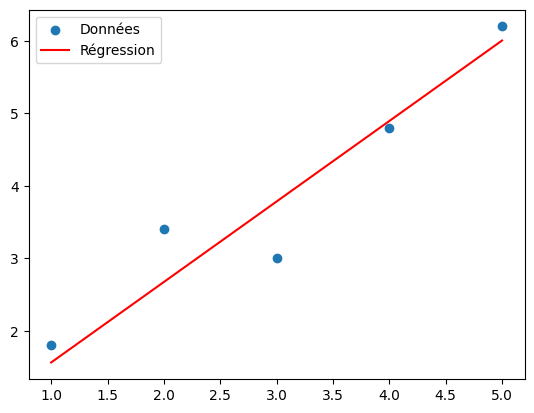

Epoch 200, m: 1.0848, b: 0.5461


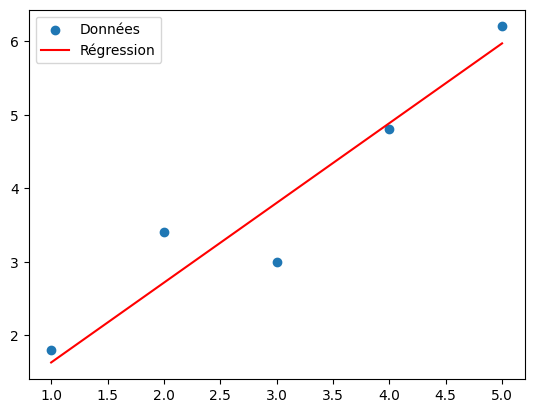

Epoch 300, m: 1.0662, b: 0.6133


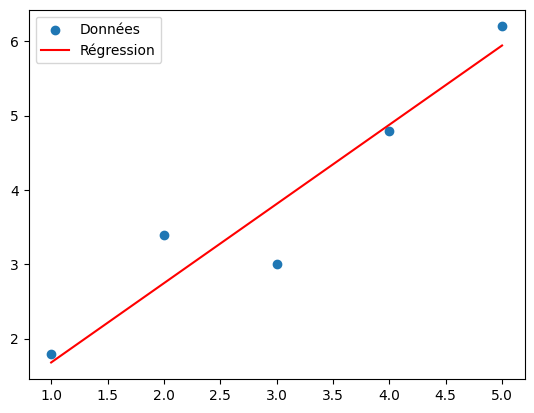

Epoch 400, m: 1.0529, b: 0.6612


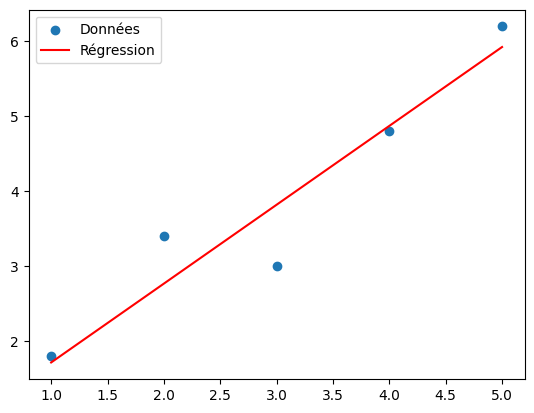

Epoch 500, m: 1.0435, b: 0.6953


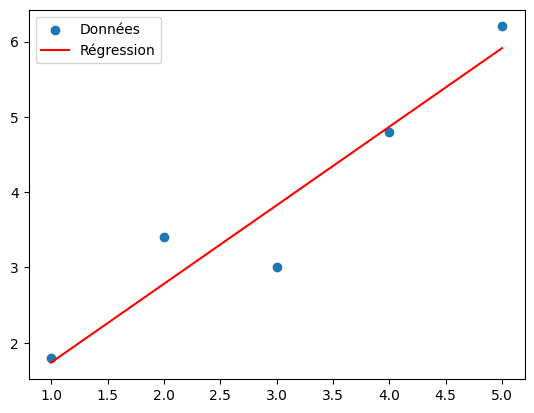

Epoch 600, m: 1.0367, b: 0.7196


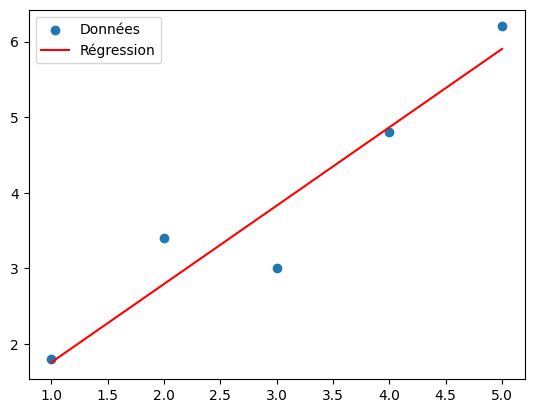

Epoch 700, m: 1.0319, b: 0.7370


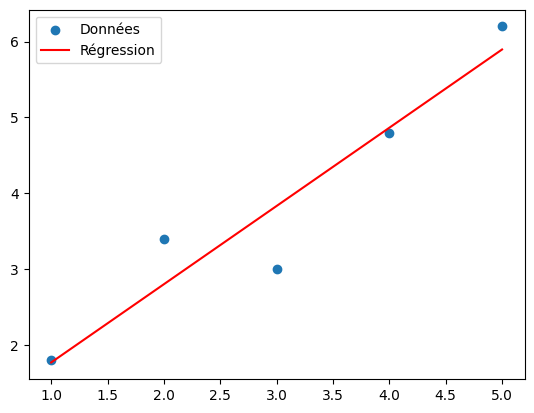

Epoch 800, m: 1.0285, b: 0.7493


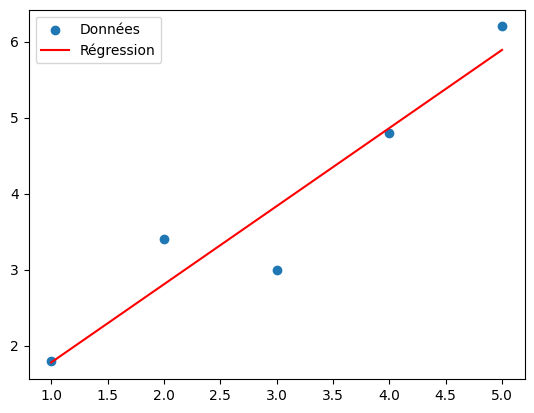

Epoch 900, m: 1.0261, b: 0.7581


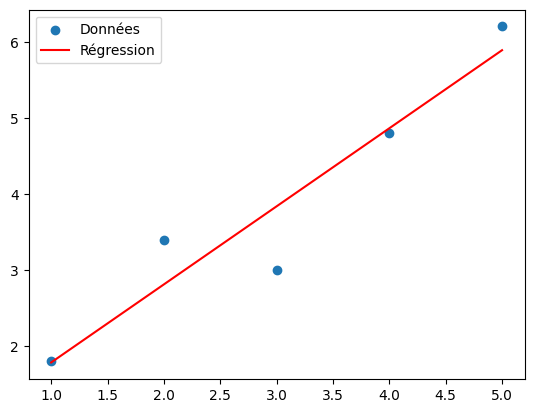

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1, 2, 3, 4, 5])
y = np.array([1.8, 3.4, 3.0, 4.8, 6.2])

m, b = 0.0, 0.0
learning_rate = 0.01
epochs = 1000

# dg
for _ in range(epochs):
    y_pred = m * X + b
    gradient_m = -2 * np.sum(X * (y - y_pred)) / len(X)
    gradient_b = -2 * np.sum(y - y_pred) / len(X)
    m -= learning_rate * gradient_m
    b -= learning_rate * gradient_b

    if _ % 100 == 0:
      print(f"Epoch {_}, m: {m:.4f}, b: {b:.4f}")
      plt.scatter(X, y, label="Données")
      plt.plot(X, m * X + b, color='red', label="Régression")
      plt.legend()
      plt.show()



# Deep Learning

Le perceptron ou threshold logic unit / TLU

![perceptron](https://bloommagazine.home.blog/wp-content/uploads/2019/02/perceptron.png)

Convolutional Neural Networks (CNN)


![CNN](https://cdn-ilcabpl.nitrocdn.com/XTpGTaZWYQSxctfMHQPVOQKOsBspWTQi/assets/images/optimized/rev-1a43245/learnopencv.com/wp-content/uploads/2023/01/Convolutional-Neural-Networks-1024x611.png)

Recurrent Neural Networks (RNN)

![RNN](https://miro.medium.com/v2/resize:fit:720/format:webp/1*Vt7tkMDupqcYk0pgl2-uig.png)

Les architectures !

![VAE](https://theaisummer.com/static/25f603171034d2fc8f6a518b8537f85a/ee604/vae.png)

In [ ]:
from transformers import pipeline

In [ ]:
classifier = pipeline('sentiment-analysis')

Gnews = "Nvidia releases a new groundbreaking GPU that outperforms competitors."
Bnews = "Nvidia releases a new groundbreaking GPU but it underperforms competitors."


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
gres = classifier(Gnews)
bres = classifier(Bnews)

print("Sentiment:", gres[0]['label'])
print("Confidence:", gres[0]['score'])
print("-------------------------------")
print("Sentiment:", bres[0]['label'])
print("Confidence:", bres[0]['score'])

Sentiment: POSITIVE
Confidence: 0.9993932247161865
-------------------------------
Sentiment: NEGATIVE
Confidence: 0.7893688678741455


# Code Motion detection:

![demo](support/cover.jpg)

In [1]:
from IPython.display import Video

Video("support/demo.mp4")

In [3]:
# from IPython.display import HTML

# HTML("""
#     <video alt="demo" controls>
#         <source src="support/demo.mp4" type="video/mp4">
#     </video>
# """)

#Detection d'objets !!!

Calcule de parametres par couche:
$$n*m+m$$

« Bonjour, comment ça va aujourd'hui? »

Embeddings = taille de 300 (valeur courante), chaque mot/Token/unitée de sens de la phrase sera représenté par un vecteur de taille 300.

Réseau : Architecture simple avec une seule couche dense (fully connected).
Soit une couche d'entré une couche Hidden et une couche de sortie.

$n$ = 5 tokens

$d_{emb}$ = 300

$h$ = 128

entrée = $n \times d_{emb} = 5 \times 300 = 1500$

Nombre de poids : $1500 \times 128 = 192,000$

Biais H = 128

biais sortie = 1

$\text{Paramètres totaux} = 192,000 + 128 + 128 + 1 = 192,257$

# Tiny ML

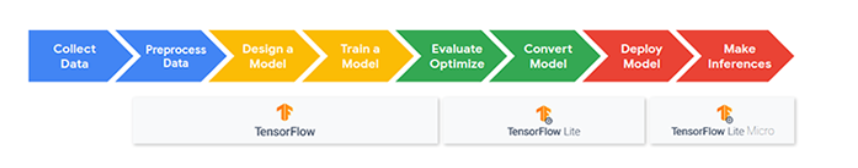

In [ ]:
include "person_detect_model_data.h"

// Keep model aligned to 8 bytes to guarantee aligned 64-bit accesses.
alignas(8) const unsigned char g_person_detect_model_data[] = {
    0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x00, 0x00, 0x00,
    0x00, 0x0e, 0x00, 0x18, 0x00, 0x04, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x10, 0x00,
    0x14, 0x00, 0x0e, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00, 0x84, 0x95, 0x04,
    0x00, 0xec, 0x5b, 0x03, 0x00, 0xd4, 0x5b, 0x03, 0x00, 0x04, 0x00, 0x00, 0x00,
    0x5a, 0x00, 0x00, 0x00, 0xc4, 0x5b, 0x03, 0x00, 0xac, 0x5b, 0x03, 0x00, 0x94,
    0x5b, 0x03, 0x00, 0x84, 0x59, 0x03, 0x00, 0x74, 0x55, 0x03, 0x00, 0x64, 0x55,
    0x02, 0x00, 0x54, 0x51, 0x02, 0x00, 0x44, 0x48, 0x02, 0x00, 0x34, 0x44, 0x02,
    0x00, 0x24, 0x42, 0x02, 0x00, 0x94, 0x3d, 0x02, 0x00, 0x84, 0x3b, 0x02, 0x00,
    0x74, 0xfb, 0x01, 0x00, 0xe4, 0xf6, 0x01, 0x00, 0xd4, 0xb6, 0x01, 0x00, 0xc4,
    0xb4, 0x01, 0x00, 0xb4, 0x74, 0x01, 0x00, 0xa4, 0x72, 0x01, 0x00, 0x94, 0x70,
    0x01, 0x00, 0x84, 0x6e, 0x01, 0x00, 0x74, 0x2e, 0x01, 0x00, 0x64, 0xee, 0x00,
    0x00, 0x54, 0xec, 0x00, 0x00, 0xc4, 0xe7, 0x00, 0x00, 0xb4, 0xe5, 0x00, 0x00,
    0xa4, 0xc5, 0x00, 0x00, 0x94, 0xc4, 0x00, 0x00, 0x44, 0xc2, 0x00, 0x00, 0x34,
    0xb2, 0x00, 0x00, 0x24, 0xb1, 0x00, 0x00, 0x14, 0xa9, 0x00, 0x00, 0x84, 0xa8,
    0x00, 0x00, 0x54, 0xa7, 0x00, 0x00, 0x44, 0xa3, 0x00, 0x00, 0xb4, 0xa2, 0x00,
    0x00, 0x84, 0xa1, 0x00, 0x00, 0x34, 0xa1, 0x00, 0x00, 0x2c, 0xa1, 0x00, 0x00,
    0x24, 0xa1, 0x00, 0x00, 0x1c, 0xa1, 0x00, 0x00, 0x14, 0xa1, 0x00, 0x00, 0x0c,
    0xa1, 0x00, 0x00, 0x04, 0xa1, 0x00, 0x00, 0xfc, 0xa0, 0x00, 0x00, 0xf4, 0xa0,
    0x00, 0x00, 0xec, 0xa0, 0x00, 0x00, 0xe4, 0xa0, 0x00, 0x00, 0xdc, 0xa0, 0x00,
    0x00, 0x8c, 0xa0, 0x00, 0x00, 0x84, 0xa0, 0x00, 0x00, 0x7c, 0xa0, 0x00, 0x00,
    0x74, 0xa0, 0x00, 0x00, 0x6c, 0xa0, 0x00, 0x00, 0x64, 0xa0, 0x00, 0x00, 0x5c,
    0xa0, 0x00, 0x00, 0x4c, 0x9e, 0x00, 0x00, 0x1c, 0x9e, 0x00, 0x00, 0x14, 0x9e,
    0x00, 0x00, 0x74, 0x9d, 0x00, 0x00, 0xe4, 0x9c, 0x00, 0x00, 0x8c, 0x9c, 0x00,
    0x00, 0x7c, 0x9a, 0x00, 0x00, 0xec, 0x99, 0x00, 0x00, 0x5c, 0x99, 0x00, 0x00,
    0x54, 0x99, 0x00, 0x00, 0x4c, 0x99, 0x00, 0x00, 0x44, 0x99, 0x00, 0x00, 0x3c,
    0x99, 0x00, 0x00, 0xe4, 0x98, 0x00, 0x00, 0xd4, 0x18, 0x00, 0x00, 0xc4, 0x16,
    0x00, 0x00, 0x34, 0x12, 0x00, 0x00, 0xa4, 0x0d, 0x00, 0x00, 0x9c, 0x0d, 0x00,
    0x00, 0x94, 0x0d, 0x00, 0x00, 0x8c, 0x0d, 0x00, 0x00, 0x7c, 0x0c, 0x00, 0x00,
    0x2c, 0x0a, 0x00, 0x00, 0x1c, 0x08, 0x00, 0x00, 0x14, 0x08, 0x00, 0x00, 0x84,
    0x03, 0x00, 0x00, 0x7c, 0x03, 0x00, 0x00, 0x4c, 0x03, 0x00, 0x00, 0x3c, 0x01,
    0x00, 0x00, 0x2c, 0x00, 0x00, 0x00, 0x24, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00,
    0x00, 0x14, 0x00, 0x00, 0x00, 0x0c, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
    0x7c, 0xfc, 0xfb, 0xff, 0x80, 0xfc, 0xfb, 0xff, 0x84, 0xfc, 0xfb, 0xff, 0x88,
    0xfc, 0xfb, 0xff, 0x8c, 0xfc, 0xfb, 0xff, 0xba, 0xa4, 0xfc, 0xff, 0x04, 0x00,
    0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x37, 0x0f, 0x00, 0x00, 0x5d, 0xe6, 0xff,
    0xff, 0x75, 0xdd, 0xff, 0xff, 0xee, 0xf7, 0xff, 0xff, 0xa4, 0xfa, 0xff, 0xff,
    0xc7, 0xf5, 0xff, 0xff, 0x0a, 0x0c, 0x00, 0x00, 0xdb, 0x16, 0x00, 0x00, 0x06,
    0x09, 0x00, 0x00, 0x81, 0x1b, 0x00, 0x00, 0xc1, 0x29, 0x00, 0x00, 0xd2, 0x18,
    0x00, 0x00, 0xd0, 0xf6, 0xff, 0xff, 0x93, 0x5c, 0x00, 0x00, 0xf3, 0xb9, 0xff,
    0xff, 0x0a, 0x28, 0x00, 0x00, 0xed, 0xe9, 0xff, 0xff, 0x86, 0xc9, 0xff, 0xff,
    0x28, 0x27, 0x00, 0x00, 0x77, 0x04, 0x00, 0x00, 0x7a, 0xd0, 0xff, 0xff, 0xad,
    0x58, 0x00, 0x00, 0x1c, 0x4b, 0x00, 0x00, 0xb0, 0x9b, 0xff, 0xff, 0xb5, 0xce,
    0xff, 0xff, 0xfc, 0x12, 0x00, 0x00, 0x3e, 0xfd, 0xff, 0xff, 0x4b, 0xf5, 0xff,
    0xff, 0xae, 0xcb, 0xff, 0xff, 0xc3, 0x39, 0x00, 0x00, 0x56, 0xd1, 0xff, 0xff,